In [16]:
%cd Documents/R/2022_Experiment/datos21JUN24

[WinError 3] The system cannot find the path specified: 'Documents/R/2022_Experiment/datos21JUN24'
C:\Users\Carlos\Documents\R\2022_Experiment\datos21JUN24


In [17]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5095-7D78

 Directory of C:\Users\Carlos\Documents\R\2022_Experiment\datos21JUN24

21/06/2024  06:43    <DIR>          .
01/11/2024  16:13    <DIR>          ..
21/06/2024  06:34            17.320 20240609_erroneousFlight1.csv
21/06/2024  06:34            17.329 20240609_erroneousFlight2.csv
21/06/2024  06:34            17.782 20240620_erroneousFlight3.csv
21/06/2024  06:34            18.346 20240620_erroneousFlight4.csv
21/06/2024  06:42            17.225 20240621_goodFlight1.csv
21/06/2024  06:42            17.177 20240621_goodFlight2.csv
21/06/2024  06:34         1.927.966 report2_4 erroneous flights.html
               7 File(s)      2.033.145 bytes
               2 Dir(s)  470.170.247.168 bytes free


In [27]:
import pandas as pd

#settings:
umbralCriticidad = 0.25

#paths:
pathFlights = r"C:\Users\Carlos\Documents\R\2022_Experiment\datos21JUN24"
#flightName1 = '20240609_erroneousFlight1.csv'
#flightName1 = '20240609_erroneousFlight2.csv'
#flightName1 = '20240620_erroneousFlight3.csv'
flightName1 = '20240620_erroneousFlight4.csv'
#flightName1 = '20240621_goodFlight1.csv'
#flightName1 = '20240621_goodFlight2.csv'
pathCriticos = r"C:\Users\Carlos\Documents\R\2022_Experiment\datos24OCT24Serafin"
flightName2 = 'criticos.txt'

# Read the CSV file into a DataFrame (flight variables)
file_path = r"%s\%s" % (pathFlights, flightName1)
dfFlight = pd.read_csv(file_path)
#df.rename(columns = {list(df)[0]:'slot'}, inplace=True)

# Read the CSV file into a DataFrame (SA estimation)
file_path = r"%s\%s" % (pathCriticos, flightName2)
dfCriticos = pd.read_csv(file_path)


lstCritico = [0] * len(dfFlight.index) # aquí guardaremos el número de ocurrencias de críticos en cada instante de tiempo
lstCriticidad = [1] * len(dfFlight.index) # aquí guardaremos la criticidad de esos críticos en cada instante de tiempo
lstSAmain = [0] * len(dfFlight.index) # aquí guardamos el Endsley SA level que se considera determinante en la bajada de SA
lstSAsecondary = [0] * len(dfFlight.index) # # aquí guardamos el Endsley SA level que se considera contribuyente en la bajada de SA
#for row in dfCriticos.rows:

for index, row in dfCriticos.iterrows():
    str1 = row['flight'].strip().lower()
    if str1 == flightName1.strip().lower():
        # ... el cociente del primer valor entre el segundo es el que indica la intensidad (cuanto más cerca de 0 más intenso) con la que está ocurriendo la anomalía:
        lstCriticidad[row[1]] =  row[4] / row[5] 
       
        if lstCriticidad[row[1]] < umbralCriticidad:
            lstCritico[row[1]] =  lstCritico[row[1]] + 1

        typeVar = row[2].strip()
        if typeVar == 'dscrTimeNavlogCheck':
            lstSAmain[row[1]]=3
            lstSAsecondary[row[1]]=2
        elif typeVar == 'dscrPBNdeviationIntegrCorr':
            lstSAmain[row[1]]=3
            lstSAsecondary[row[1]]=1
        elif typeVar == 'dscrTimeTrackCheck':
            lstSAmain[row[1]]=1
            lstSAsecondary[row[1]]=2
        elif typeVar == 'dscrTimeWPTCheckCurrLeg':
            lstSAmain[row[1]]=1
            lstSAsecondary[row[1]]=2
        elif typeVar == 'dscrTimeWPTCheckNxtLeg':
            lstSAmain[row[1]]=2
            lstSAsecondary[row[1]]=3
        else:
            lstSAmain[row[1]]=0
            lstSAsecondary[row[1]]=0
        #else:
            #print(str1 + flightName1 + ' are different')
        

dfFlight['criticos'] = lstCritico       
dfFlight['criticidad'] = lstCriticidad
dfFlight['safail'] = lstSAmain
print(dfFlight['safail'])
# Access data in the DataFrame using column names or indexing
#print(df['slot'])
#print(dfCriticos['flight'])
#print(dfCriticos.iloc[0])  # Access first row



0      0
1      0
2      0
3      0
4      0
      ..
279    0
280    0
281    0
282    1
283    0
Name: safail, Length: 284, dtype: int64


<Axes: >

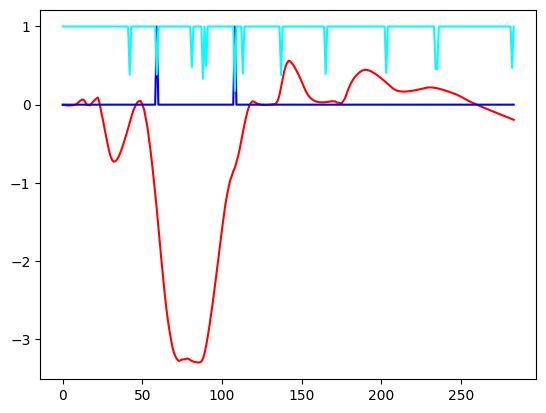

In [29]:
#dfFlight["dscrPBNdeviationIntegrCorr"].plot()
dfFlight["PBNdeviation"].plot(color='red')
dfFlight["criticos"].plot(color='blue') # nº de ocurrencias de críticos en cada instante de tiempo  (modulado por el umbral de criticidad)
dfFlight["criticidad"].plot(color='cyan') # Criticidad de esos críticos en cada instante de tiempo (no le afecta el umbral de criticidad)
#dfFlight["safail"].plot(color='green')

# colors: https://matplotlib.org/stable/gallery/color/named_colors.html